In [1]:
import sympy as sp

In [2]:
a, b, c, x, L, EA, F = sp.symbols('a, b, c, x, L, EA, F')

In [3]:
u_trial = a + b * x + c * x **2

In [4]:
eq1 = sp.Eq(u_trial.subs(x,0),0)
eq2 = sp.Eq(u_trial.subs(x,2*L),0)
sol = sp.solve((eq1,eq2),(a,b))
display(sol)
u_trial = u_trial.subs(sol)
display(u_trial)

{a: 0, b: -2*L*c}

-2*L*c*x + c*x**2

In [5]:
eps_trial = u_trial.diff(x)

In [6]:
Ev = sp.integrate(EA*eps_trial**2/2,(x,0,L))+sp.integrate(EA*2*eps_trial**2/2,(x,L,2*L))
display(Ev)

2*EA*L**3*c**2

In [7]:
V = Ev + F * u_trial.subs(x,L)
display(V)

2*EA*L**3*c**2 - F*L**2*c

F/(4*EA*L)

-F*x/(2*EA) + F*x**2/(4*EA*L)

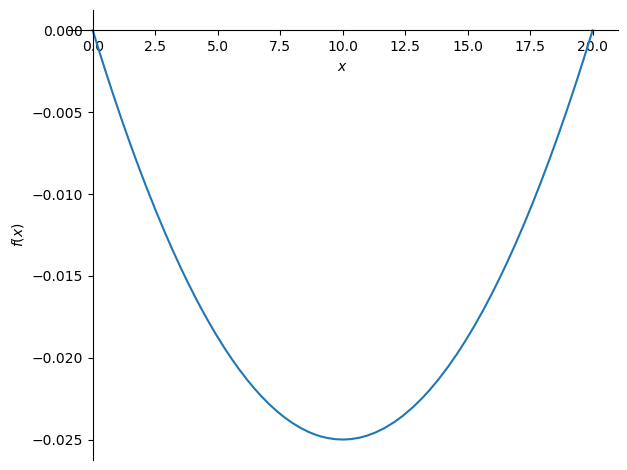

In [8]:
eq3 = sp.Eq(V.diff(c),0)
c_sol = sp.solve(eq3,c)[0]
display(c_sol)
u_trial_subs = u_trial.subs(c,c_sol)
display(u_trial_subs)
sp.plot(u_trial_subs.subs([(F,10),(EA,1000),(L,10)]), (x , 0 , 20),label='Result $u_{trial}$');
eps_trial_sub = u_trial_subs.diff(x).subs([(F,10),(EA,1000),(L,10)])
N_trial_1_sub = 1000 * eps_trial_sub
N_trial_2_sub = 2*1000 * eps_trial_sub

In [9]:
u1 = sp.symbols('u1',cls=sp.Function)
u2 = sp.symbols('u2',cls=sp.Function)

DV1 = sp.Eq(EA*u1(x).diff(x,2),0)
DV2 = sp.Eq(2*EA*u2(x).diff(x,2),0)

display(DV1)
display(DV2)

Eq(EA*Derivative(u1(x), (x, 2)), 0)

Eq(2*EA*Derivative(u2(x), (x, 2)), 0)

In [10]:
C1, C2, C3, C4 = sp.symbols('C1, C2, C3, C4')
sol = sp.dsolve([DV1,DV2],[u1(x),u2(x)])
u1_sol = sol[0].rhs
u2_sol = sol[1].rhs
display(u1_sol)
display(u2_sol)

C1 + C2*x

C3 + C4*x

In [11]:
eps1 = u1_sol.diff(x)
N1= EA * eps1
eps2 = u2_sol.diff(x)
N2= 2 * EA * eps2
eq4 = sp.Eq(u1_sol.subs(x,0),0)
display(eq4)
eq5 = sp.Eq(u1_sol.subs(x,L),u2_sol.subs(x,L))
display(eq5)
eq6 = sp.Eq(N1.subs(x,L)+F,N2.subs(x,L))
display(eq6)
eq7 = sp.Eq(u2_sol.subs(x,2*L),0)
display(eq7)
sol = sp.solve((eq4,eq5,eq6,eq7),(C1,C2,C3,C4))
display(sol)
u1_subs = u1_sol.subs(sol)
u2_subs = u2_sol.subs(sol)
display(u1_subs)
display(u2_subs)

Eq(C1, 0)

Eq(C1 + C2*L, C3 + C4*L)

Eq(C2*EA + F, 2*C4*EA)

Eq(C3 + 2*C4*L, 0)

{C1: 0, C2: -F/(3*EA), C3: -2*F*L/(3*EA), C4: F/(3*EA)}

-F*x/(3*EA)

-2*F*L/(3*EA) + F*x/(3*EA)

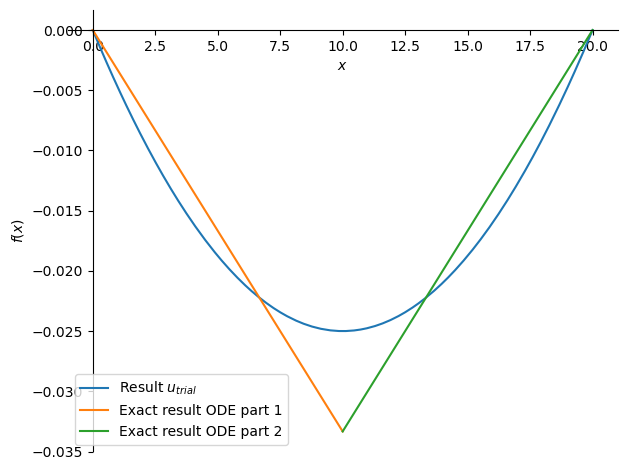

In [12]:
p0 = sp.plot(u_trial_subs.subs([(F,10),(EA,1000),(L,10)]), (x , 0 , 20),label='Result $u_{trial}$',legend=True,show=False)
p1 = sp.plot(u1_subs.subs([(F,10),(EA,1000),(L,10)]), (x , 0 , 10),label='Exact result ODE part 1',show=False)
p2 = sp.plot(u2_subs.subs([(F,10),(EA,1000),(L,10)]), (x , 10 , 20),label='Exact result ODE part 2',show=False)
p0.append(p1[0])
p0.append(p2[0])
p0.show()

In [16]:
eps_1_sub = u1_subs.diff(x).subs([(F,10),(EA,1000),(L,10)])
eps_2_sub = u2_subs.diff(x).subs([(F,10),(EA,1000),(L,10)])
N_1_sub = 1000 * eps_1_sub
N_2_sub = 2*1000 * eps_2_sub

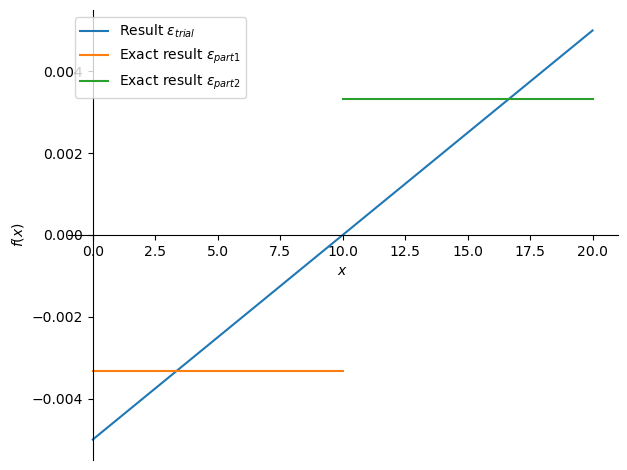

In [20]:
p0 = sp.plot(eps_trial_sub, (x , 0 , 20),label='Result $\epsilon_{trial}$',legend=True,show=False)
p1 = sp.plot(eps_1_sub, (x , 0 , 10),label='Exact result $\epsilon_{part 1}$',show=False)
p2 = sp.plot(eps_2_sub, (x , 10 , 20),label='Exact result $\epsilon_{part 2}$',show=False)
p0.append(p1[0])
p0.append(p2[0])
p0.show()

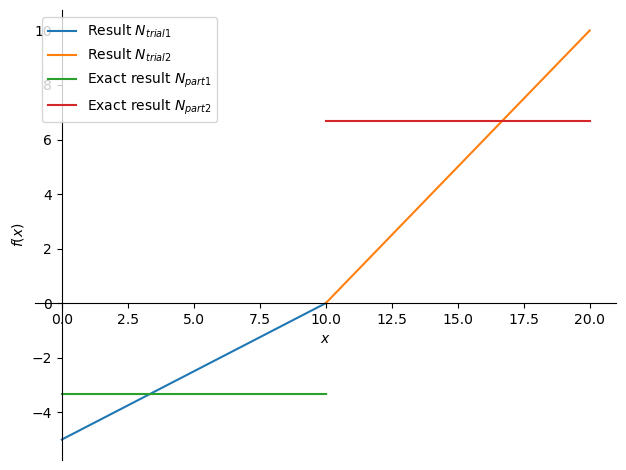

In [19]:
p0 = sp.plot(N_trial_1_sub, (x , 0 , 10),label='Result $N_{trial 1}$',legend=True,show=False)
p1 = sp.plot(N_trial_2_sub, (x , 10 , 20),label='Result $N_{trial 2}$',show=False)
p2 = sp.plot(N_1_sub, (x , 0 , 10),label='Exact result $N_{part 1}$',show=False)
p3 = sp.plot(N_2_sub, (x , 10 , 20),label='Exact result $N_{part 2}$',show=False)
p0.append(p1[0])
p0.append(p2[0])
p0.append(p3[0])
p0.show()

In [ ]:
display(N_trial_1_sub)